In [3]:
library(fpp2)

In [16]:
# 4. 확률과정 𝑍𝑡 = 1 + 0.9𝑍𝑡−1 + 𝜀𝑡 (𝑡 = 1,2, … ,100) 으로부터 시계열자료를 생성한 후 다음을 수행하라. 단,
# 𝑍0 = 10의 값을 주고 오차항 {εt}은 WN (white noise) N(0,1)이라고 가정한다. 

z <- ts(numeric(100))
z[1] = 10

e <- rnorm(100)
for(t in 2:100){
   z[t] <- 1 + 0.9 * z[t - 1] + e[i]
}

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

 Time-Series [1:100] from 1 to 100: 10 10.8 11.5 12.1 12.7 ...


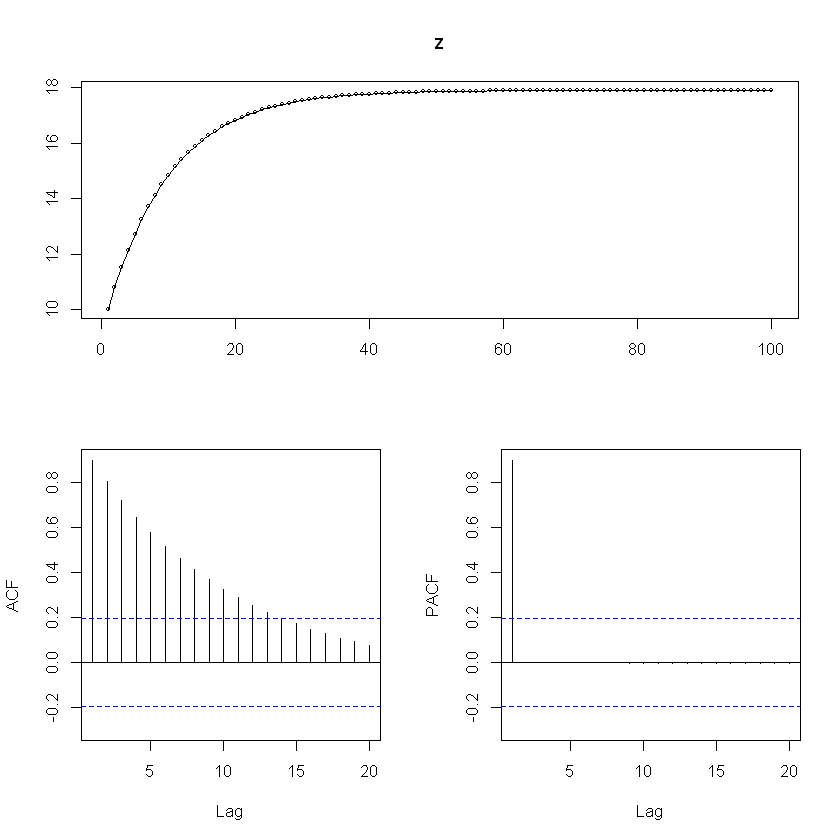

In [17]:
tsdisplay(z)